In [33]:
import numpy as np
import tensorflow as tf
import skimage.io as io
import matplotlib.pyplot as plt

from tensorflow import keras

In [80]:
greyscale_multiplier = [0.07, 0.72, 0.21]

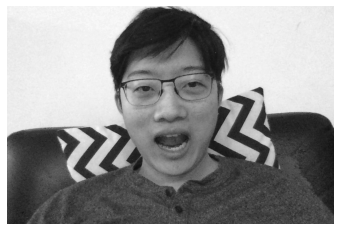

In [92]:
I = io.imread('./data/test_pics/pic.jpg')
I_greyscale = I.dot(greyscale_multiplier)[..., np.newaxis]

plt.imshow(I_greyscale, cmap = plt.cm.gray)
plt.axis('off')
plt.show()

In [93]:
I_greyscale.shape

(720, 1080, 1)

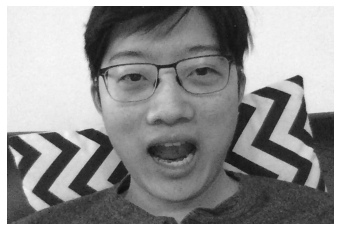

In [96]:
I_cropped = tf.image.central_crop(I_greyscale, 0.7)
plt.imshow(I_cropped.numpy().astype(int), cmap = plt.cm.gray)
plt.axis('off')
plt.show()

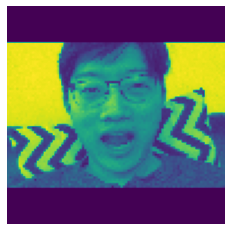

In [97]:
I_reshaped = tf.image.resize_with_pad(I_cropped, 96, 96)
plt.imshow(I_reshaped.numpy().astype(int))
plt.axis('off')
plt.show()

In [85]:
model = keras.models.load_model('./tmp/model_cbl/')

In [86]:
labels = ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y']

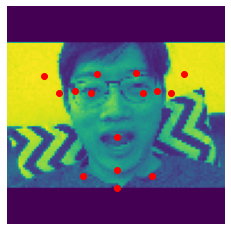

In [98]:
preds = model.predict(I_reshaped[...,0][np.newaxis, :])

preds_xs = preds[:, np.argwhere(['_x' in l for l in labels])]
preds_ys = preds[:, np.argwhere(['_y' in l for l in labels])]

plt.imshow(I_reshaped.numpy().astype(int))
plt.scatter(preds_xs[0], preds_ys[0], color='r')
plt.axis('off')
plt.show()